In [0]:
from sklearn import datasets

# Load the data
wine_data = datasets.load_wine()

# Display information about the dataset
print(wine_data.keys())
for key,value in wine_data.items():
    print(key,'\n',value,'\n')

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
data 
 [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] 

target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

target_names 
 ['class_0' 'class_1' 'class_2'] 

DESCR 
 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set 

In [0]:
import pandas as pd

# Convert to Pandas dataframe
wineDF = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
wineDF['target']=wine_data['target']
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [0]:
from sklearn import preprocessing

#Scale data to [0,1]
data=wine_data['data']
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)
wineDF_scaled = pd.DataFrame(data=data_scaled,columns=wine_data['feature_names'])
wineDF_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [0]:
from sklearn.model_selection import train_test_split


#Split into train and test set
train_data, test_data, train_label, test_label = train_test_split(data_scaled,wine_data['target'],test_size=0.2)
print('Train data: ',train_data.shape)
print('Train label: ',train_label.shape)
print('Test data: ',test_data.shape)
print('Test label: ',test_label.shape)

Train data:  (142, 13)
Train label:  (142,)
Test data:  (36, 13)
Test label:  (36,)


In [0]:
import tensorflow as tf

# Define number of node in input, output and each hidden layer 
n_features=train_data.shape[1]
n_classes=3
n_hidden1=128
n_hidden2=64

# Reset the default graph in the case if we want to rerun this code blick
tf.reset_default_graph()

# Define placeholder for inputData
inputData=tf.placeholder(tf.float64,(None,n_features),name="input")

# Define each layer for the neural network
hidden1=tf.layers.dense(inputData,n_hidden1,activation=tf.nn.relu,name="layer1")
hidden2=tf.layers.dense(hidden1,n_hidden2,activation=tf.nn.relu,name="layer2")
logit=tf.layers.dense(hidden2,n_classes,name="logit")

# Define the loss function
cross_entropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=train_label,logits=logit)
loss=tf.reduce_mean(cross_entropy,name="loss")

# Define Optimization algorithm
learning_rate=0.01
optimizer=tf.train.AdamOptimizer(learning_rate)
training_op=optimizer.minimize(loss)                       


In [0]:
# Evaluate the accuracy of the Model

# Define placeholder for the actual labels
actual_labels=tf.placeholder(tf.int64,name="labels")

# Take the highest value as the prediction 
pred=tf.argmax(logit,1)

# Compare the prediction to the actual label
correct_pred=tf.cast(tf.equal(pred,actual_labels),tf.float64)

# Calculate the accuracy by averaging the correct_pred
accuracy=tf.reduce_mean(correct_pred)

In [0]:
# Define the number of epoch
epoches=50

# Create a session and initialse all variables
sess=tf.Session()
sess.run(tf.global_variables_initializer())

train_accuracyList=[]
test_accuracyList=[]

for i in range(epoches):
  # Train the model and calculate the accuracy of the current model
  _,train_accuracy=sess.run((training_op,accuracy),feed_dict={inputData:train_data,actual_labels:train_label})
  train_accuracyList.append(train_accuracy)
  
  # Calculate the accuracy of the Model with the testset
  test_accuracy=sess.run(accuracy,feed_dict={inputData:test_data,actual_labels:test_label})
  test_accuracyList.append(test_accuracy)
  
  # Display the accuracy result
  print(i+1,'. Train accuracy: ',train_accuracy,'Test accuracy: ',test_accuracy)

1 . Train accuracy:  0.2535211267605634 Test accuracy:  0.5
2 . Train accuracy:  0.5704225352112676 Test accuracy:  0.8055555555555556
3 . Train accuracy:  0.9154929577464789 Test accuracy:  0.9444444444444444
4 . Train accuracy:  0.971830985915493 Test accuracy:  1.0
5 . Train accuracy:  0.9507042253521126 Test accuracy:  1.0
6 . Train accuracy:  0.9507042253521126 Test accuracy:  1.0
7 . Train accuracy:  0.9647887323943662 Test accuracy:  1.0
8 . Train accuracy:  0.9788732394366197 Test accuracy:  1.0
9 . Train accuracy:  0.9788732394366197 Test accuracy:  1.0
10 . Train accuracy:  0.9788732394366197 Test accuracy:  1.0
11 . Train accuracy:  0.9788732394366197 Test accuracy:  1.0
12 . Train accuracy:  0.9788732394366197 Test accuracy:  0.9722222222222222
13 . Train accuracy:  0.9929577464788732 Test accuracy:  0.9722222222222222
14 . Train accuracy:  0.9929577464788732 Test accuracy:  0.9722222222222222
15 . Train accuracy:  0.9929577464788732 Test accuracy:  0.9722222222222222
16 . 

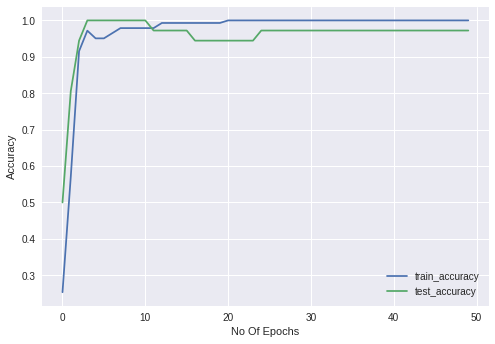

In [0]:
import matplotlib.pyplot as plt

# Plot the train_accuracy and test_accuracy
plt.plot(train_accuracyList)
plt.plot(test_accuracyList)
plt.xlabel("No Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['train_accuracy', 'test_accuracy'], loc='lower right')